In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class CONFIG:
    DATA_DIR = "F:/Data/UPSELL_V4/"
    DATA_PATH = DATA_DIR + "FEATURE_ACTIVE_XM_OTO_202304031715_data.csv"
    COL_TO_DROP = ['CUSTOMER_CODE', 'RANK_', 'CUSTOMER_CODE_INFO', 'LOAN_WID', 'THANG', 'CREATED_DT', 'LOAN_DPD', 'LAST_DATE', 'FIRST_DATE', 'MIN_DISB_DATE', 'DISBURSE_DATE_WID']

In [3]:
data = pd.read_csv(CONFIG.DATA_PATH, usecols=lambda x: x not in CONFIG.COL_TO_DROP)

C:\Users\duclh3\AppData\Local\Temp\ipykernel_25672\3653622828.py:1: DtypeWarning: Columns (120) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(CONFIG.DATA_PATH, usecols=lambda x: x not in CONFIG.COL_TO_DROP)


In [4]:
data.CUSTOMER_CODE_2.nunique()

163227

In [5]:
data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'], format='%Y%m%d')
data['NEXT_DISBURSE_DATE_WID'] = pd.to_datetime(data['NEXT_DISBURSE_DATE_WID'], format='%Y%m%d')

In [6]:
data['IS_UPSELL_NEXT_3_MONTHS'] = (data['TIME_TO_DISBURSE'] <= 3).astype(int)

In [7]:
null_cols = data.isnull().sum()/ data.shape[0]*100
null_cols.sort_values(ascending=False)

B_SCORE                    95.370284
SALARY_TYPE_CODE           83.937174
MONTHLY_INCOME_VALUE       77.640202
A_SCORE                    75.259382
TIME_TO_CONTRACT_3M        74.614864
                             ...    
AVG_LTV_12M                 0.000000
AVG_LTV_9M                  0.000000
AVG_LTV_6M                  0.000000
AVG_LTV_3M                  0.000000
IS_UPSELL_NEXT_3_MONTHS     0.000000
Length: 118, dtype: float64

In [8]:
data.drop_duplicates(['DATE_TIME','CUSTOMER_CODE_2'],keep=False, inplace=True)

In [9]:
data = data[data.ASSET_TYPE.isin(['DKXM','DKOTO'])]

In [10]:
CUSTOMER_CODE_2 = data['CUSTOMER_CODE_2'].unique()

In [14]:
x = data.groupby('DATE_TIME')['IS_UPSELL_NEXT_3_MONTHS'].mean().reset_index()

In [17]:
x

DATE_TIME  IS_UPSELL_NEXT_3_MONTHS
0  2018-01-31                 0.403030
1  2018-02-28                 0.513382
2  2018-03-31                 0.423684
3  2018-04-30                 0.446475
4  2018-05-31                 0.402128
..        ...                      ...
57 2022-10-31                 0.758965
58 2022-11-30                 0.898281
59 2022-12-31                 1.000000
60 2023-01-31                 1.000000
61 2023-02-28                 1.000000

[62 rows x 2 columns]

([<matplotlib.axis.XTick at 0x1d4091e7610>,
 [Text(0.0, 0, '2018-01'),
  Text(1.0, 0, '2018-02'),
  Text(2.0, 0, '2018-03'),
  Text(3.0, 0, '2018-04'),
  Text(4.0, 0, '2018-05'),
  Text(5.0, 0, '2018-06'),
  Text(6.0, 0, '2018-07'),
  Text(7.0, 0, '2018-08'),
  Text(8.0, 0, '2018-09'),
  Text(9.0, 0, '2018-10'),
  Text(10.0, 0, '2018-11'),
  Text(11.0, 0, '2018-12'),
  Text(12.0, 0, '2019-01'),
  Text(13.0, 0, '2019-02'),
  Text(14.0, 0, '2019-03'),
  Text(15.0, 0, '2019-04'),
  Text(16.0, 0, '2019-05'),
  Text(17.0, 0, '2019-06'),
  Text(18.0, 0, '2019-07'),
  Text(19.0, 0, '2019-08'),
  Text(20.0, 0, '2019-09'),
  Text(21.0, 0, '2019-10'),
  Text(22.0, 0, '2019-11'),
  Text(23.0, 0, '2019-12'),
  Text(24.0, 0, '2020-01'),
  Text(25.0, 0, '2020-02'),
  Text(26.0, 0, '2020-03'),
  Text(27.0, 0, '2020-04'),
  Text(28.0, 0, '2020-05'),
  Text(29.0, 0, '2020-06'),
  Text(30.0, 0, '2020-07'),
  Text(31.0, 0, '2020-08'),
  Text(32.0, 0, '2020-09'),
  Text(33.0, 0, '2020-10'),
  Text(34.0, 0

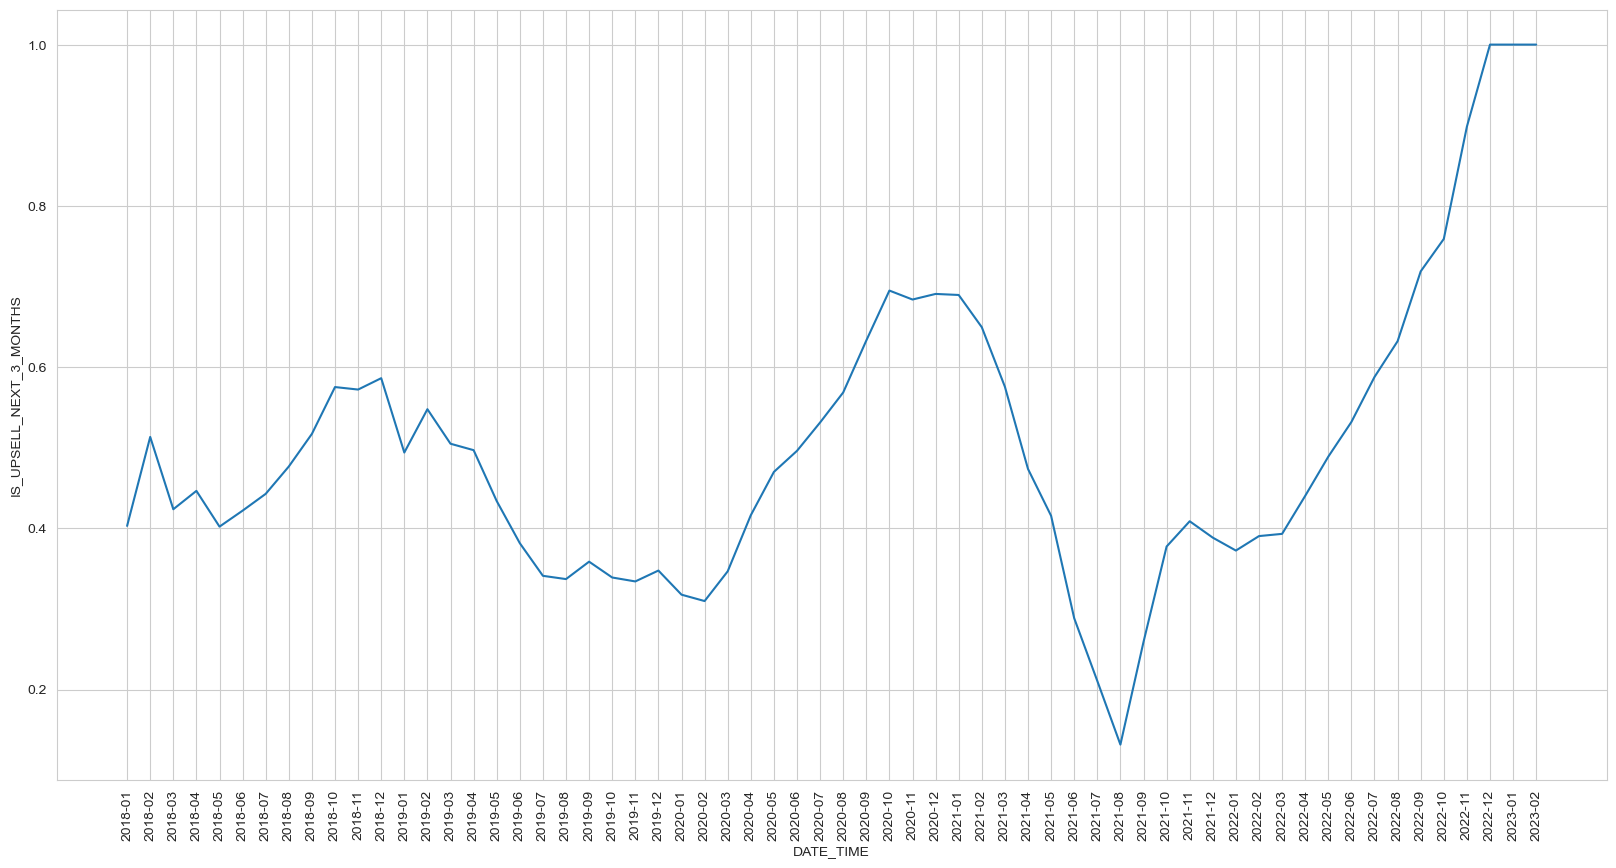

In [47]:
plt.figure(figsize=(20,10))
# x['DATE_TIME'] = x.DATE_TIME.apply(lambda x: x. strftime('%Y-%m'))
ax = sns.lineplot(x='DATE_TIME', y='IS_UPSELL_NEXT_3_MONTHS',data=x)
plt.xticks(ticks=x['DATE_TIME'], labels=x['DATE_TIME'], rotation=90)

In [44]:
f

0     2018-01
1     2018-02
2     2018-03
3     2018-04
4     2018-05
       ...   
57    2022-10
58    2022-11
59    2022-12
60    2023-01
61    2023-02
Name: DATE_TIME, Length: 62, dtype: object

In [41]:
ax.get_xticks()

array([17167., 17532., 17897., 18262., 18628., 18993., 19358.])

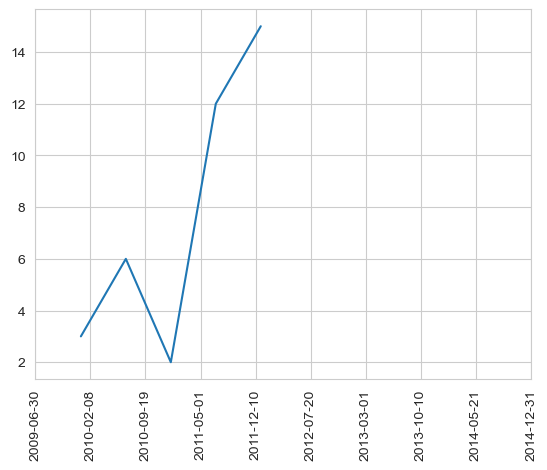

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

sample_data = [3, 6, 2, 12, 15]
e = pd.date_range('2010-01-01', '2011-12-31',5) #these will be x-coordinates for data
f = pd.date_range('2009-06-30', '2014-12-31',10) #these will be x-axis labels
f = f.strftime('%Y-%m-%d') #reformatted axis labels

fig, ax = plt.subplots(1)
ax.plot(e,sample_data)
ax.set_xticks(f, f, rotation=90)
plt.show()

In [30]:
f

Index(['2009-06-30', '2010-02-08', '2010-09-19', '2011-05-01', '2011-12-10',
       '2012-07-20', '2013-03-01', '2013-10-10', '2014-05-21', '2014-12-31'],
      dtype='object')

In [11]:
len(CUSTOMER_CODE_2)

152869

In [35]:
test_size = int(len(CUSTOMER_CODE_2)*0.2)

In [36]:
TEST_CUSTOMER_CODE_2 = np.random.choice(CUSTOMER_CODE_2, test_size, replace=False)

In [37]:
train_df = data[~data['CUSTOMER_CODE_2'].isin(TEST_CUSTOMER_CODE_2)]
test_df = data[data['CUSTOMER_CODE_2'].isin(TEST_CUSTOMER_CODE_2)]

In [38]:
train_df.IS_UPSELL_NEXT_3_MONTHS.value_counts()

1    371042
0    338184
Name: IS_UPSELL_NEXT_3_MONTHS, dtype: int64

In [39]:
test_df.IS_UPSELL_NEXT_3_MONTHS.value_counts()

1    93135
0    85384
Name: IS_UPSELL_NEXT_3_MONTHS, dtype: int64

In [40]:
test_df.to_csv(CONFIG.DATA_DIR + 'test.csv', index=False)
train_df.to_csv(CONFIG.DATA_DIR + 'train.csv', index=False)

In [41]:
'THOI_GIAN_DA_VAY' in data.columns

True

In [49]:
x['IS_UPSELL_NEXT_3_MONTHS'].mean()

0.4990078360171592

In [52]:
data[data.DATE_TIME==pd.to_datetime('2021-08-31')]['IS_UPSELL_NEXT_3_MONTHS'].value_counts()

0    16464
1     2499
Name: IS_UPSELL_NEXT_3_MONTHS, dtype: int64

In [54]:
data.groupby('DATE_TIME').size()

DATE_TIME
2018-01-31      330
2018-02-28      411
2018-03-31      380
2018-04-30      383
2018-05-31      470
              ...  
2022-10-31    40351
2022-11-30    33396
2022-12-31    22382
2023-01-31    15601
2023-02-28     5514
Length: 62, dtype: int64